In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import tensorflow as tf
assert tf.__version__.startswith('2')

import os
import numpy as np
import matplotlib.pyplot as plt

In [17]:
tf.__version__

'2.6.0'

In [3]:
base_dir = '/content/drive/MyDrive/image'

In [4]:
IMAGE_SIZE = 224
BATCH_SIZE = 64

datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255, 
    validation_split=0.2)

train_generator = datagen.flow_from_directory(
    base_dir,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE, 
    subset='training')

val_generator = datagen.flow_from_directory(
    base_dir,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE, 
    subset='validation')

Found 1341 images belonging to 10 classes.
Found 331 images belonging to 10 classes.


In [5]:
for image_batch, label_batch in train_generator:
  break
image_batch.shape, label_batch.shape

((64, 224, 224, 3), (64, 10))

In [6]:
print (train_generator.class_indices)

labels = '\n'.join(sorted(train_generator.class_indices.keys()))

with open('labels.txt', 'w') as f:
  f.write(labels)

{'Apple': 0, 'Banana': 1, 'Carambola': 2, 'Guava': 3, 'Mango': 4, 'Orange': 5, 'Peach': 6, 'Pitaya': 7, 'Pomegranate': 8, 'Tomato': 9}


In [7]:
IMG_SHAPE = (IMAGE_SIZE, IMAGE_SIZE, 3)

# Create the base model from the pre-trained model MobileNet V2
base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                              include_top=False, 
                                              weights='imagenet')

9420800/9406464 [==============================] - 0s 0us/step


In [8]:
base_model.trainable = False

In [9]:
model = tf.keras.Sequential([
  base_model,
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.GlobalAveragePooling2D(),
  tf.keras.layers.Dense(10, activation='softmax')
])

In [10]:
model.compile(optimizer=tf.keras.optimizers.Adam(), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_224 (Functi (None, 7, 7, 1280)        2257984   
_________________________________________________________________
conv2d (Conv2D)              (None, 5, 5, 32)          368672    
_________________________________________________________________
dropout (Dropout)            (None, 5, 5, 32)          0         
_________________________________________________________________
global_average_pooling2d (Gl (None, 32)                0         
_________________________________________________________________
dense (Dense)                (None, 10)                330       
Total params: 2,626,986
Trainable params: 369,002
Non-trainable params: 2,257,984
_________________________________________________________________


In [12]:
print('Number of trainable variables = {}'.format(len(model.trainable_variables)))

Number of trainable variables = 4


In [13]:
epochs = 10

history = model.fit(train_generator, 
                    steps_per_epoch=len(train_generator), 
                    epochs=epochs, 
                    validation_data=val_generator, 
                    validation_steps=len(val_generator))

Epoch 1/10
21/21 [==============================] - 668s 32s/step - loss: 1.9189 - accuracy: 0.4556 - val_loss: 0.8543 - val_accuracy: 0.6586
Epoch 2/10
21/21 [==============================] - 45s 2s/step - loss: 0.6611 - accuracy: 0.7427 - val_loss: 0.5313 - val_accuracy: 0.8066
Epoch 3/10
21/21 [==============================] - 44s 2s/step - loss: 0.4061 - accuracy: 0.8635 - val_loss: 0.3628 - val_accuracy: 0.8701
Epoch 4/10
21/21 [==============================] - 44s 2s/step - loss: 0.3048 - accuracy: 0.8896 - val_loss: 0.3553 - val_accuracy: 0.8610
Epoch 5/10
21/21 [==============================] - 44s 2s/step - loss: 0.2693 - accuracy: 0.9023 - val_loss: 0.2777 - val_accuracy: 0.9154
Epoch 6/10
21/21 [==============================] - 45s 2s/step - loss: 0.2300 - accuracy: 0.9023 - val_loss: 0.2531 - val_accuracy: 0.8882
Epoch 7/10
21/21 [==============================] - 45s 2s/step - loss: 0.1967 - accuracy: 0.9045 - val_loss: 0.2024 - val_accuracy: 0.8912
Epoch 8/10
21/21 [

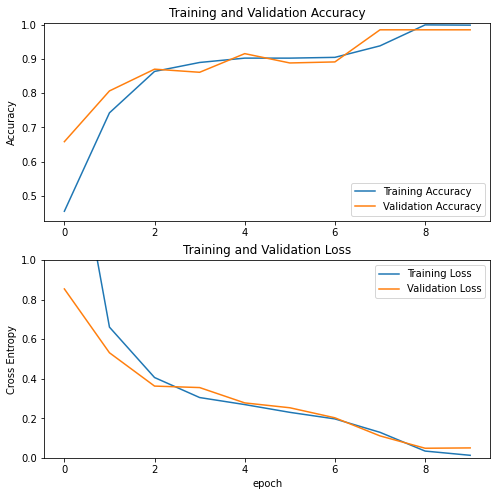

In [14]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8,8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1.005])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [15]:
base_model.trainable = True

In [16]:
model.compile(loss='categorical_crossentropy',
              optimizer = tf.keras.optimizers.Adam(1e-5),
              metrics=['accuracy'])

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_224 (Functi (None, 7, 7, 1280)        2257984   
_________________________________________________________________
conv2d (Conv2D)              (None, 5, 5, 32)          368672    
_________________________________________________________________
dropout (Dropout)            (None, 5, 5, 32)          0         
_________________________________________________________________
global_average_pooling2d (Gl (None, 32)                0         
_________________________________________________________________
dense (Dense)                (None, 10)                330       
Total params: 2,626,986
Trainable params: 2,592,874
Non-trainable params: 34,112
_________________________________________________________________


In [18]:
print('Number of trainable variables = {}'.format(len(model.trainable_variables)))

Number of trainable variables = 160


In [19]:
history_fine = model.fit(train_generator, 
                         steps_per_epoch=len(train_generator), 
                         epochs=5, 
                         validation_data=val_generator, 
                         validation_steps=len(val_generator))

Epoch 1/5
21/21 [==============================] - 232s 11s/step - loss: 0.7945 - accuracy: 0.7442 - val_loss: 0.0620 - val_accuracy: 0.9728
Epoch 2/5
21/21 [==============================] - 224s 11s/step - loss: 0.3379 - accuracy: 0.8963 - val_loss: 0.0856 - val_accuracy: 0.9637
Epoch 3/5
21/21 [==============================] - 223s 11s/step - loss: 0.1780 - accuracy: 0.9567 - val_loss: 0.1027 - val_accuracy: 0.9607
Epoch 4/5
21/21 [==============================] - 222s 11s/step - loss: 0.1295 - accuracy: 0.9664 - val_loss: 0.1117 - val_accuracy: 0.9607
Epoch 5/5
21/21 [==============================] - 222s 11s/step - loss: 0.0864 - accuracy: 0.9866 - val_loss: 0.1121 - val_accuracy: 0.9607


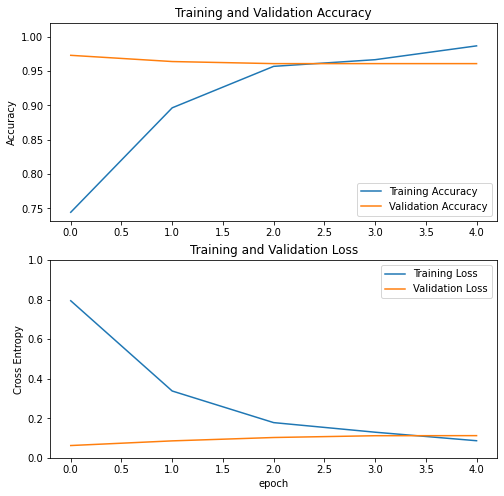

In [20]:
acc = history_fine.history['accuracy']
val_acc = history_fine.history['val_accuracy']

loss = history_fine.history['loss']
val_loss = history_fine.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1.02])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [21]:
saved_model_dir = 'save/fine_tuning'
tf.saved_model.save(model, saved_model_dir)

converter = tf.lite.TFLiteConverter.from_saved_model(saved_model_dir)
tflite_model = converter.convert()

with open('model.tflite', 'wb') as f:
  f.write(tflite_model)

INFO:tensorflow:Assets written to: save/fine_tuning/assets


INFO:tensorflow:Assets written to: save/fine_tuning/assets


In [22]:
from google.colab import files

files.download('model.tflite')
files.download('labels.txt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>